# ID2214: Programming for Data Science
## Exploratory Data Analysis
### adapted from Amir Hossein A. Rahnama

In this tutorial, we will walk through an elementary exploratory data analysis part on a Kaggle dataset called 
 [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows). We will show how the power of exploratory data analysis and how it can answer our questions about the dataset.

In [7]:
!pip install seaborn
!pip install plotly
import numpy as np
import pandas as pd

#for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.2)
import plotly.express as px
from plotly import graph_objects as go

#plot wordcloud
from collections import Counter
from wordcloud import WordCloud

#silence warnings
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
netflix_overall = pd.read_csv('./data/netflix_titles.csv')
netflix_overall

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [6]:
netflix_overall.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### First, let us see how the dataset is distributed between movies and TV shows:

In [10]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

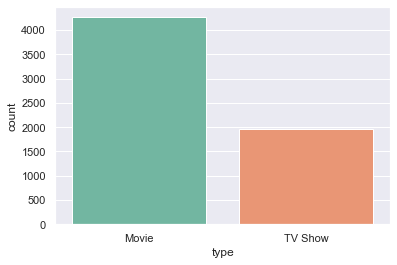

In [51]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")
plt.show()

After that let us create a heatmap of when these movies and tv shows were added to the Netflix database:

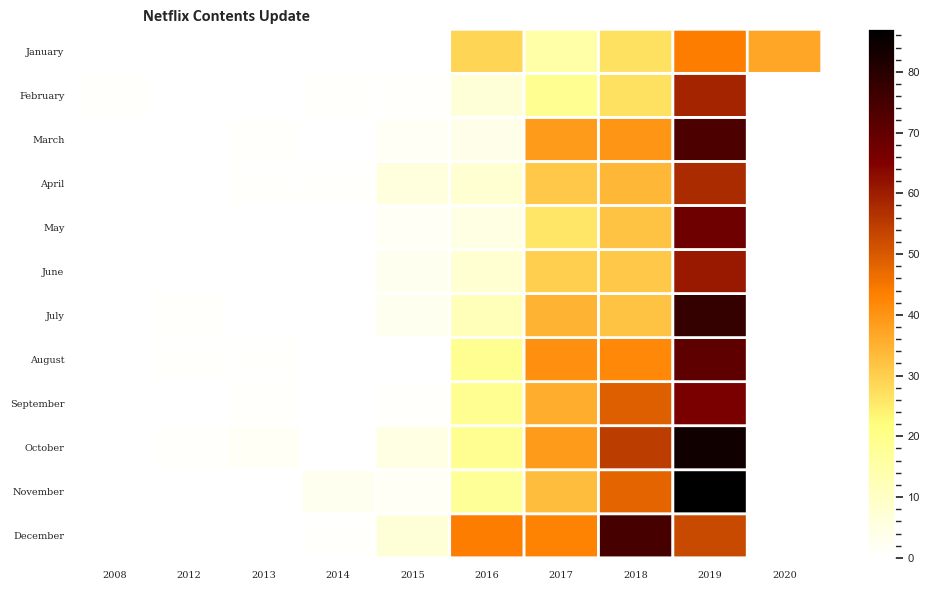

In [65]:
# use dataframe[['']] to get one column dataframe;
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(12, 7), dpi=100)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

#### What type of movie/tv show ratings exist in the database:

Index(['TV-MA', 'TV-14', 'R', 'TV-PG', 'PG-13', 'NR', 'PG', 'TV-G', 'TV-Y7',
       'TV-Y', 'G', 'TV-Y7-FV', 'UR', 'NC-17'],
      dtype='object')


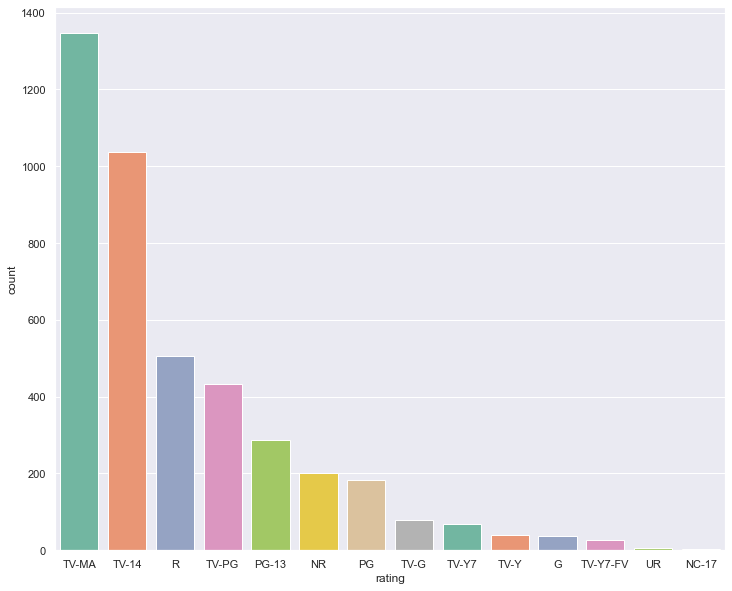

In [73]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
# print(netflix_movies['rating'].value_counts().index[0:15])
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])
plt.show()

### Merging data sources

In many cases, you would like to extend the data source you have using common shared keys or data points. Imagine two data sources about countries and you would like to get information from all of them. 

In [8]:
imdb_ratings=pd.read_csv('./data/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('./data/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

In [9]:
ratings.head()

,Title,Release Year,Rating,Genre
0,Miss Jerry,1894,5.9,Romance
1,The Story of the Kelly Gang,1906,6.1,"Biography, Crime, Drama"
2,Den sorte drøm,1911,5.8,Drama
3,Cleopatra,1912,5.2,"Drama, History"
4,L'Inferno,1911,7.0,"Adventure, Drama, Fantasy"


There are many ways to merge data sources, here is a view of different strategies:

<img width="500" height="500" src='https://miro.medium.com/max/1200/1*9eH1_7VbTZPZd9jBiGIyNA.png'>

Source: https://medium.com/swlh/merging-dataframes-with-pandas-pd-merge-7764c7e2d46d

In [10]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall, left_on='Title', right_on='title', how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [11]:
netflix_overall.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [12]:
joint_data.count()

Title           2332
Release Year    2332
Rating          2332
Genre           2332
show_id         2332
type            2332
title           2332
director        2026
cast            2283
country         2278
date_added      2330
release_year    2332
rating          2331
duration        2332
listed_in       2332
description     2332
dtype: int64

Let us try to find out the countries with the highest number of films in the Netflix datasource: 

In [13]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,658
India,608
United Kingdom,106
Canada,48
Philippines,41
Spain,40
South Korea,31
Australia,30
France,29
Indonesia,29


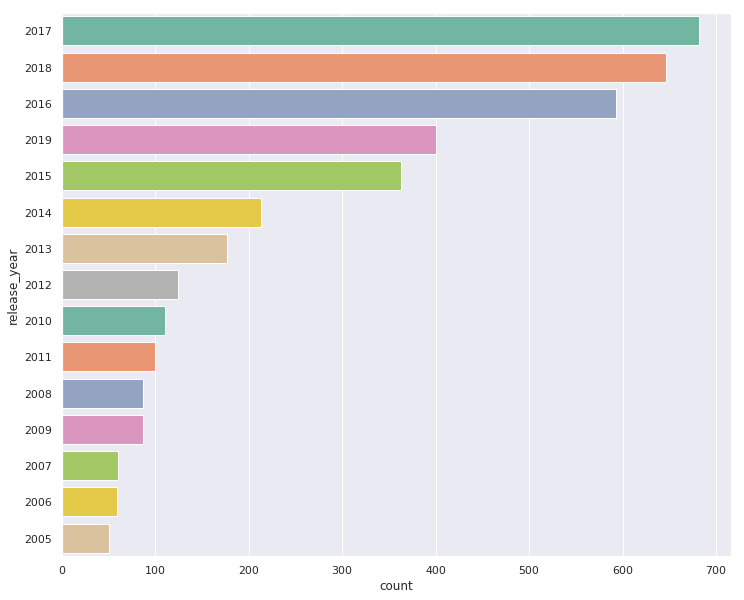

In [14]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

In [15]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

In [16]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


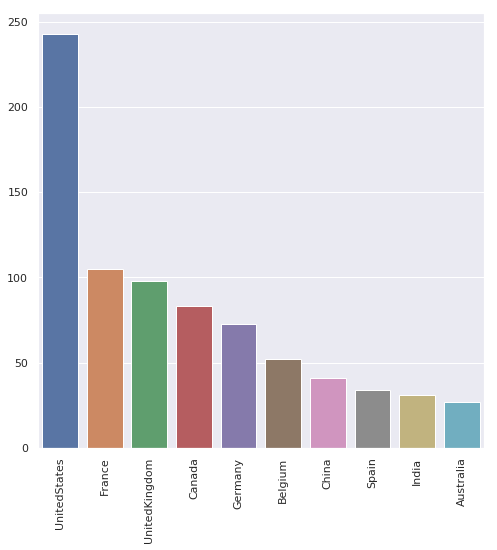

In [17]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)
plt.show()

Another interesting question might be to look at how long is each movie in the datasource:

In [18]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)

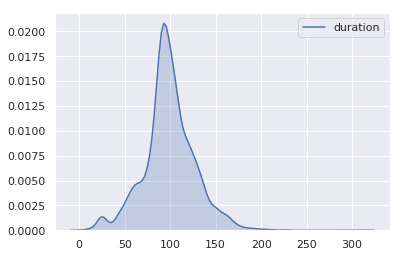

In [19]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)
plt.show()

Using the power of wordclouds we can highlight visually which genres are most popular among movies? 

In [20]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

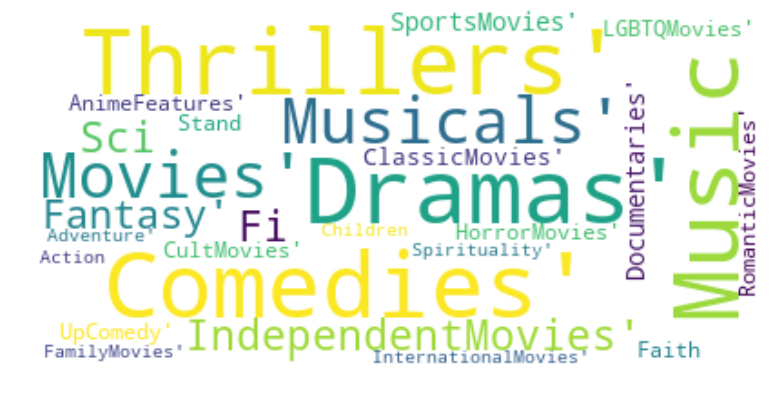

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

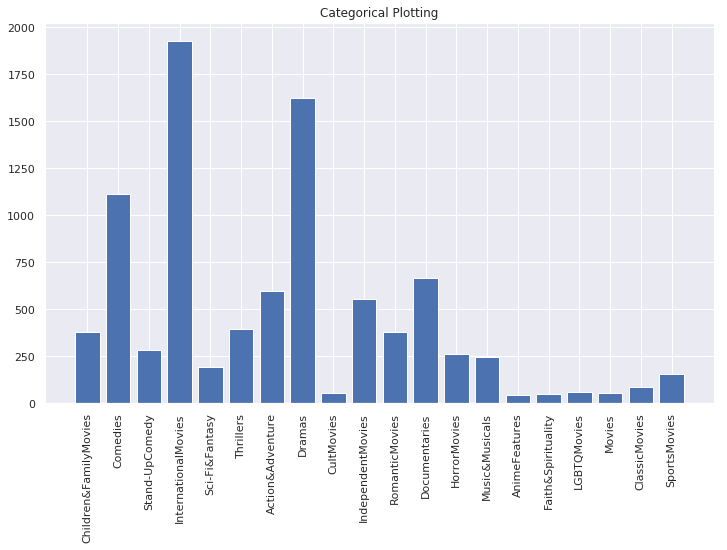

In [22]:
names = list(g.keys())
values = list(g.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 7), sharey=True)
axs.bar(np.arange(len(names)), values)
axs.set_xticks(np.arange(len(names)))
axs.set_xticklabels(names, rotation = 90)
axs.set_title('Categorical Plotting')
plt.show()

In [23]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season','')

durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s','')

In [24]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [25]:
t=['title','no_of_seasons']

top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

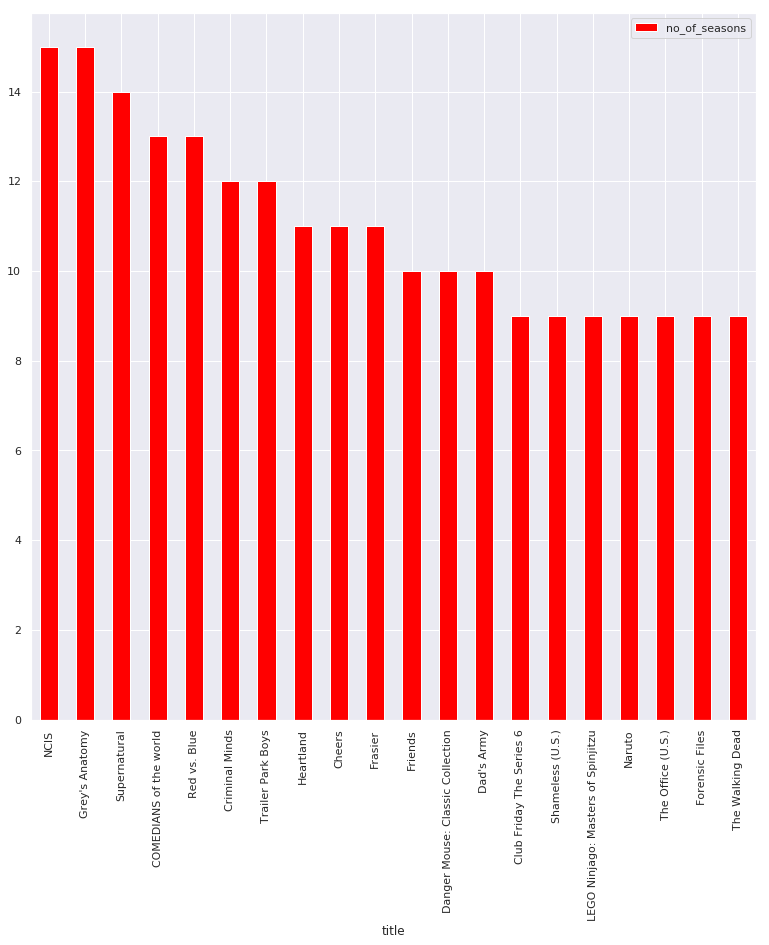

In [26]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')
plt.show()

We can ask what are the popular genres of the tv shows: 

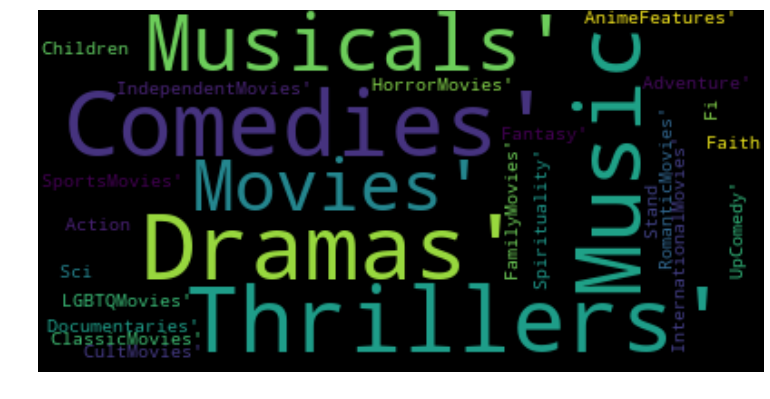

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Filtered on the country, what are the oldest TV shows on Netflix?

In [28]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [29]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [30]:
oldest_us_series['title']

4079    Pioneers of African-American Cinema
5981    The Twilight Zone (Original Series)
5980                 The Andy Griffith Show
5704                              Star Trek
5774                      Highway to Heaven
369                               High Risk
5982                             Twin Peaks
3864               Ken Burns: The Civil War
6094                    Pee-wee's Playhouse
5976                                 Cheers
6203         Star Trek: The Next Generation
6032                          V.R. Troopers
2236                    Ken Burns: The West
6028             Star Trek: Deep Space Nine
2207           Mystery Science Theater 3000
5706                     Star Trek: Voyager
3734               Power Rangers Time Force
5012                     Behind Enemy Lines
6233                                Friends
6225                                Frasier
Name: title, dtype: object

and similarly the newest:

In [31]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:20]

In [32]:
newest_us_series['title']

3379    Killer Inside: The Mind of Aaron Hernandez
3541                                       Messiah
3467                                Medical Police
3189                                         Cheer
3221                           Go! Go! Cory Carson
3464                              AJ and the Queen
3426              Kipo and the Age of Wonderbeasts
3325                                Sex, Explained
1806                                   The Society
2446                   Super Monsters Monster Pets
2447                             Tales of the City
5876                               Madam Secretary
2494                     Malibu Rescue: The Series
2515                                     Exhibit A
6131                               Jane The Virgin
5882                              Documentary Now!
2577                                  Mr. Iglesias
5758                                      Atypical
2659                Awake: The Million Dollar Game
2663                           

So I hope that you got a basic understanding of the process of exploratory data analysis with this tutorial and it can prepare you for your real projects.